In [29]:
# pandas-datareader
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt 


In [32]:
start = datetime.datetime(2014, 1, 1) # or start = '1/1/2016'
end = datetime.date.today()
df = web.DataReader('000422.SZ', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,6.33,6.22,6.27,6.29,9108488.0,6.259899
2014-01-03,6.28,6.11,6.27,6.16,10615338.0,6.130520
2014-01-06,6.15,5.91,6.13,5.91,12634913.0,5.881717
2014-01-07,5.96,5.83,5.92,5.90,9889647.0,5.871765
2014-01-08,6.03,5.89,5.93,5.96,9900862.0,5.931478


In [34]:
close  = df.iloc[:,-1]

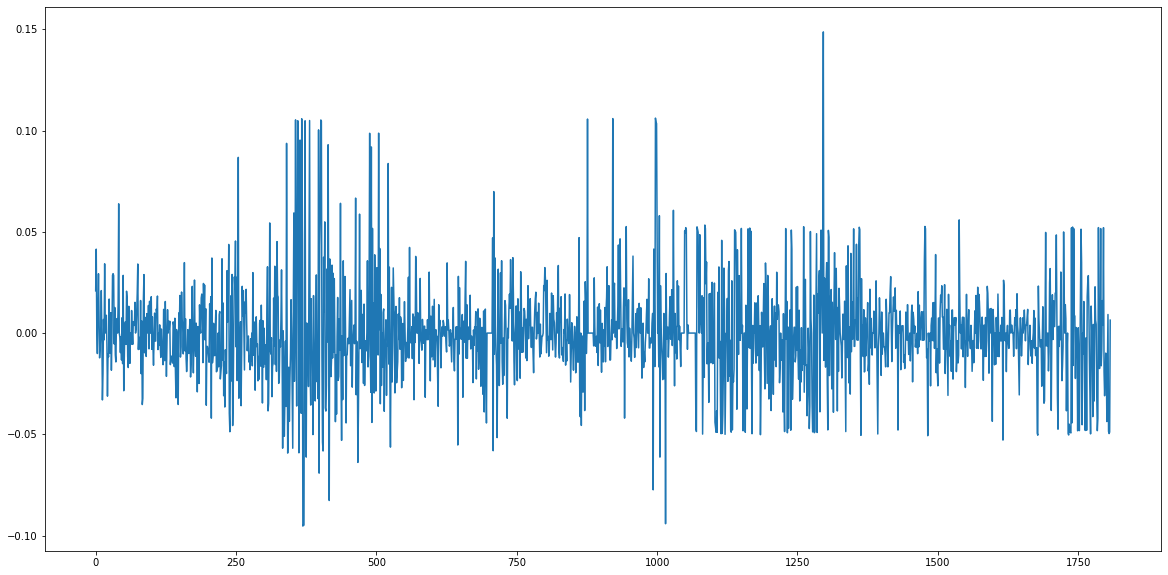

In [41]:
log_return = np.log(close/close.shift(-1))
log_return = log_return.dropna(how = 'any')
plt.figure(figsize = (20,10))
plt.plot(log_return.values)

In [44]:
stats.ttest_1samp(log_return.values, 0)

Ttest_1sampResult(statistic=0.0014996921698560135, pvalue=0.9988035847570143)

In [45]:
stats.kstest(log_return.values,'norm')

KstestResult(statistic=0.47115780517397565, pvalue=0.0)

In [46]:
stats.anderson(log_return)

AndersonResult(statistic=29.809333251823546, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))